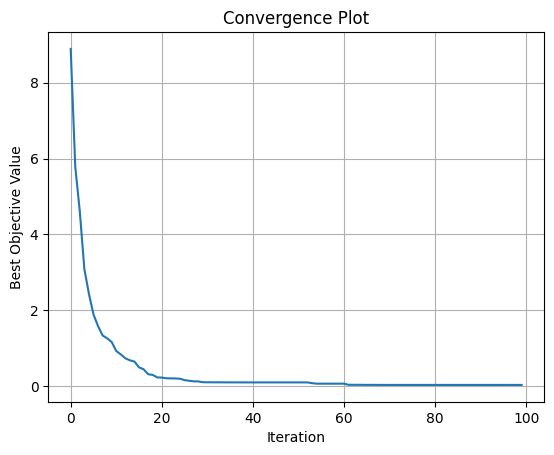

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import messagebox

class Particle:
    def __init__(self, dim, lb=-5.12, ub=5.12):
        self.position = np.random.uniform(lb, ub, size=dim)
        self.velocity = np.random.uniform(-5.12, 5.12, size=dim)
        self.best_position = self.position.copy()
        self.best_score = float('inf')
        self.fitness_history = []

def rastrigin(x):
    A = 10
    n = len(x)
    return A * n + np.sum(x ** 2 - A * np.cos(2 * np.pi * x))

def pso(objective_function, num_particles, max_iterations, num_runs, dim, lb=-5.12, ub=5.12):
    all_best_positions = []
    all_best_scores = []
    all_fitness_history = []
    
    for _ in range(num_runs):
        particles = [Particle(dim, lb, ub) for _ in range(num_particles)]
        global_best_position = np.random.uniform(lb, ub, size=dim)
        global_best_score = float('inf')
        fitness_history = []
        
        for _ in range(max_iterations):
            for particle in particles:
                score = objective_function(particle.position)
                if score < particle.best_score:
                    particle.best_position = particle.position.copy()
                    particle.best_score = score
                if score < global_best_score:
                    global_best_position = particle.best_position.copy()
                    global_best_score = score
                W = 0.5
                c1 = 1.5
                c2 = 1.5
                r1, r2 = np.random.rand(dim), np.random.rand(dim)
                particle.velocity = (W * particle.velocity +
                                     c1 * r1 * (particle.best_position - particle.position) +
                                     c2 * r2 * (global_best_position - particle.position))
                particle.position += particle.velocity
            fitness_history.append(global_best_score)
        
        all_best_positions.append(global_best_position)
        all_best_scores.append(global_best_score)
        all_fitness_history.append(fitness_history)
    
    return all_best_positions, all_best_scores, all_fitness_history

def run_optimization():
    try:
        dim = int(dim_entry.get())
        lb = float(lb_entry.get())
        ub = float(ub_entry.get())
        num_particles = int(num_particles_entry.get())
        max_iterations = int(max_iterations_entry.get())
        num_runs = int(num_runs_entry.get())
        
        best_positions, best_scores, all_ff = pso(rastrigin, num_particles, max_iterations, num_runs, dim, lb, ub)
        
        avg_best_position = np.mean(best_positions, axis=0)
        avg_best_score = np.mean(best_scores)
        
        avg_fitness_history = np.mean(all_ff, axis=0)
        
        messagebox.showinfo("Optimization Result", f"Average Best Score: {avg_best_score}")
        
        # Plot average fitness history
        plt.plot(avg_fitness_history)
        plt.xlabel('Iteration')
        plt.ylabel('Best Objective Value')
        plt.title('Convergence Plot')
        plt.grid(True)
        plt.show()
    except ValueError:
        messagebox.showerror("Error", "Please enter valid inputs.")

# GUI
root = Tk()
root.title("Particle Swarm Optimization")

# Dimension
dim_label = Label(root, text="Dimension:")
dim_label.grid(row=0, column=0)
dim_entry = Entry(root)
dim_entry.grid(row=0, column=1)

# Lower Bound
lb_label = Label(root, text="Lower Bound:")
lb_label.grid(row=1, column=0)
lb_entry = Entry(root)
lb_entry.grid(row=1, column=1)

# Upper Bound
ub_label = Label(root, text="Upper Bound:")
ub_label.grid(row=2, column=0)
ub_entry = Entry(root)
ub_entry.grid(row=2, column=1)

# Number of Particles
num_particles_label = Label(root, text="Number of Particles:")
num_particles_label.grid(row=3, column=0)
num_particles_entry = Entry(root)
num_particles_entry.grid(row=3, column=1)

# Max Iterations
max_iterations_label = Label(root, text="Max Iterations:")
max_iterations_label.grid(row=4, column=0)
max_iterations_entry = Entry(root)
max_iterations_entry.grid(row=4, column=1)

# Number of Runs
num_runs_label = Label(root, text="Number of Runs:")
num_runs_label.grid(row=5, column=0)
num_runs_entry = Entry(root)
num_runs_entry.grid(row=5, column=1)

# Run Button
run_button = Button(root, text="Run Optimization", command=run_optimization)
run_button.grid(row=6, columnspan=2)

root.mainloop()
